In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
df = pd.read_csv('HR_analytics.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


## Plot bar charts

In [3]:
left = pd.DataFrame(df[df['left']==1]['salary'].value_counts())
stay = pd.DataFrame(df[df['left']==0]['salary'].value_counts())
print(left)
print(stay)
total_salary = pd.concat([left, stay], axis=1)
total_salary.columns = ["salary_left", "salary_stay"]
total_salary['total'] = total_salary.salary_left + total_salary.salary_stay
total_salary['percent_left'] = 100*total_salary['salary_left']/total_salary['total']
total_salary['percent_stay'] = 100*total_salary['salary_stay']/total_salary['total']
total_salary

        salary
low       2172
medium    1317
high        82
        salary
low       5144
medium    5129
high      1155


,salary_left,salary_stay,total,percent_left,percent_stay
low,2172,5144,7316,29.688354,70.311646
medium,1317,5129,6446,20.431275,79.568725
high,82,1155,1237,6.628941,93.371059


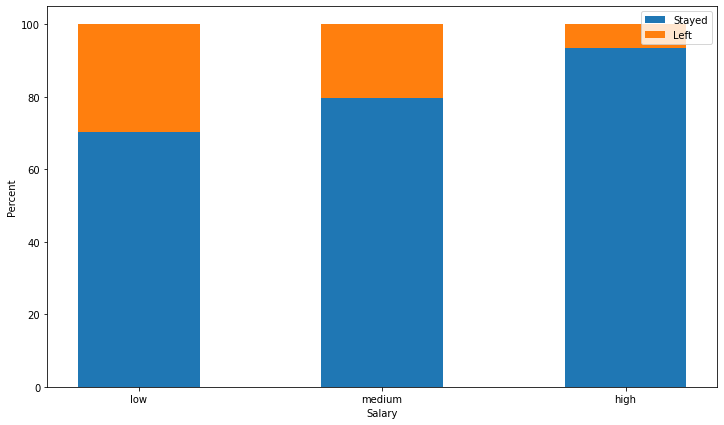

In [4]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(total_salary.index, total_salary['percent_stay'], width=0.5, label='Stayed')
ax.bar(total_salary.index, total_salary['percent_left'], width=0.5, bottom=total_salary['percent_stay'], label='Left')

ax.set_xlabel('Salary')
ax.set_ylabel('Percent')
ax.legend(loc='upper right')

plt.show()

<AxesSubplot:xlabel='salary'>

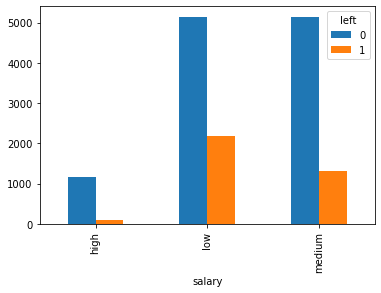

In [5]:
pd.crosstab(df.salary, df.left).plot(kind='bar')

In [6]:
left_dept = pd.DataFrame(df[df['left']==1]['Department'].value_counts())
stay_dept = pd.DataFrame(df[df['left']==0]['Department'].value_counts())
total_dept = pd.concat([left_dept, stay_dept], axis=1)
total_dept.columns = ["dept_left", "dept_stay"]
total_dept['total'] = total_dept.dept_left + total_dept.dept_stay
total_dept['percent_left'] = 100*total_dept['dept_left']/total_dept['total']
total_dept['percent_stay'] = 100*total_dept['dept_stay']/total_dept['total']
total_dept

,dept_left,dept_stay,total,percent_left,percent_stay
sales,1014,3126,4140,24.492754,75.507246
technical,697,2023,2720,25.625000,74.375000
support,555,1674,2229,24.899058,75.100942
IT,273,954,1227,22.249389,77.750611
hr,215,524,739,29.093369,70.906631
accounting,204,563,767,26.597132,73.402868
marketing,203,655,858,23.659674,76.340326
product_mng,198,704,902,21.951220,78.048780
RandD,121,666,787,15.374841,84.625159
management,91,539,630,14.444444,85.555556


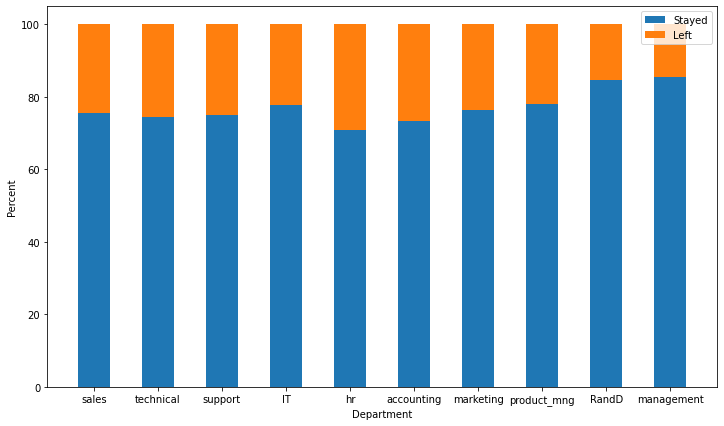

In [7]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(total_dept.index, total_dept['percent_stay'], width=0.5, label='Stayed')
ax.bar(total_dept.index, total_dept['percent_left'], width=0.5, bottom=total_dept['percent_stay'], label='Left')

ax.set_xlabel('Department')
ax.set_ylabel('Percent')
ax.legend(loc='upper right')

plt.show()

<AxesSubplot:xlabel='Department'>

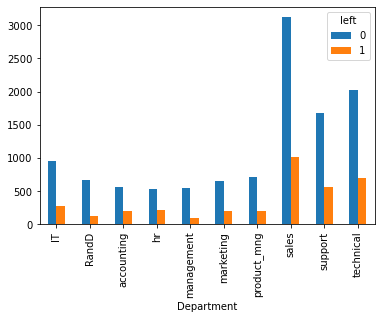

In [8]:
pd.crosstab(df.Department, df.left).plot(kind='bar')

In [9]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

## Fill String Values with Text Values

In [10]:
department_dummies = {'sales':1, 'technical':2, 'support':3, 'IT':4, 'hr':5, 'accounting':6, 'marketing':7, 'product_mng':8, 'RandD':9, 'management':10}
df['Department'] = df['Department'].map(department_dummies)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,1,low
1,0.80,0.86,5,262,6,0,1,0,1,medium
2,0.11,0.88,7,272,4,0,1,0,1,medium
3,0.72,0.87,5,223,5,0,1,0,1,low
4,0.37,0.52,2,159,3,0,1,0,1,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,3,low
14995,0.37,0.48,2,160,3,0,1,0,3,low
14996,0.37,0.53,2,143,3,0,1,0,3,low
14997,0.11,0.96,6,280,4,0,1,0,3,low


In [11]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [12]:
salary = {"low": 1, "medium": 2, "high": 3}
df['salary'] = df['salary'].map(salary)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,1,1
1,0.80,0.86,5,262,6,0,1,0,1,2
2,0.11,0.88,7,272,4,0,1,0,1,2
3,0.72,0.87,5,223,5,0,1,0,1,1
4,0.37,0.52,2,159,3,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,3,1
14995,0.37,0.48,2,160,3,0,1,0,3,1
14996,0.37,0.53,2,143,3,0,1,0,3,1
14997,0.11,0.96,6,280,4,0,1,0,3,1


In [13]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [14]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                 int64
salary                     int64
dtype: object

## Relationship Between Each Variable and Leaving/Staying

In [15]:
left = df[df.left==1]
left.shape

(3571, 10)

In [16]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [17]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
left,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,3.815978,1.650945
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,3.491459,1.414730


In [21]:
df_new = df[['satisfaction_level', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Department', 'salary']]
df_new

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,157,3,0,0,1,1
1,0.80,262,6,0,0,1,2
2,0.11,272,4,0,0,1,2
3,0.72,223,5,0,0,1,1
4,0.37,159,3,0,0,1,1
...,...,...,...,...,...,...,...
14994,0.40,151,3,0,0,3,1
14995,0.37,160,3,0,0,3,1
14996,0.37,143,3,0,0,3,1
14997,0.11,280,4,0,0,3,1


## Split Data Into Train/Test Sets

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df_new, df.left, train_size=0.8)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11999, 7)
(3000, 7)
(11999,)
(3000,)


## Train and Test Model

In [43]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)

In [44]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [45]:
y_hat = model.predict(X_test)

## Accuracy of Model

In [46]:
model.score(X_test, y_test)

0.7653333333333333